<a href="https://colab.research.google.com/github/AnIsAsPe/Estadistica_y_Probabilidad_para-CD-/blob/main/PrincipiosDeProbabilidad/Semana4/2%20Teorema_del_limite_central.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

El *teorema del límite central* establece que la **distribución de la suma** de un número grande* de ***variables iid*** será aproximadamene **normal**, sin importar la distribución subyacente


## Bibliotecas

In [1]:
import numpy as np
import pandas as pd

import random
import operator
import re # módulo operaciones expresiones regulares
import unicodedata  #para quitar tildes
from collections import Counter
from scipy.stats import norm

import matplotlib.pyplot as plt
import seaborn as sns

## Funciones

In [2]:
def errores_alturas(n, m = 500):
    '''
    n = tamaño de cada muestra
    m = cuántas muestras

    '''
    mu, sigma = 1675, 62.8     # dimensiones en milimetros

    muestras = {'muestra '+ str(i): np.random.normal(mu, sigma,n) for i in range(1, m+1)}
    alturas_hombres = pd.DataFrame.from_dict(muestras)
    sns.distplot(mu - alturas_hombres.mean(), fit=norm, kde=False, bins=50)
    plt.show()



In [3]:
def leer_libro(archivo_txt):
  '''funcion para leer un archivo en formato txt'''
  with open(archivo_txt, "r", encoding="utf8") as f:
    texto = f.read()
    texto = texto.replace("\n", "").replace("\r", "")
  return texto

In [4]:
def borrar_elementos(texto, lista):
  '''Función para eliminar en un texto los elementos contenidos en una lista,
  por ejemplo:   autor, titulo y otros elementos'''

  for elemento in lista:
    texto = texto.replace(elemento, "")
  return texto

In [5]:

def limpiar_texto(texto):
  '''Función para convertir a minúsculas, quitar signos de puntuación,
  números y tildes'''

  #Convertir en mínusculas
  texto_limpio = texto.lower()

  #Quitar puntuación
  puntuacion = [".", "," , "-", "\n", ":", ";",'"', "'", "  ",
                "!", "¡", "¿", "?", "(", ")", "<", "«", "»", "~",]
  for p in puntuacion:
    texto_limpio = texto_limpio.replace(p,"")

  #Quitar numeros

  texto_limpio = "".join(filter(lambda x: not x.isdigit(), texto_limpio))

  #Quitar tildes

  texto_limpio =''.join((c for c in unicodedata.normalize('NFD',texto_limpio) if
                         unicodedata.category(c) != 'Mn'))

  return texto_limpio

In [6]:

def genera_texto_nletras(texto, n=1, tot_letras = 100):
  '''Devuelve un texto, utilizando ngramas a partir de letras
  n es la cantidad de letras que se toman en consideración para
  generar la siguiente'''
  ngramas = {}
  for i in range(len(texto) - n):
    seq = texto[i:i+n]
    if seq not in ngramas.keys():
      ngramas[seq] = []
    ngramas[seq].append(texto[i+n])

  ngrama = np.random.choice(list(ngramas.keys()))
  nuevo_texto = ngrama

  for i in range(tot_letras):
    if ngrama not in ngramas.keys():
      break
    siguiente_letra = np.random.choice(ngramas[ngrama])
    nuevo_texto += siguiente_letra
    ngrama = nuevo_texto[len(nuevo_texto)-n:len(nuevo_texto)]
  return nuevo_texto

In [7]:
def genera_muestras_de_texto(texto, grado=0,
                             num_muestras=100,
                             tam_muestra=200 ):
  muestras={}
  for i in range(num_muestras):
    if grado == 0:
      muestras[i]= "".join(random.sample(texto, tam_muestra))
    else:
      muestras[i] = genera_texto_nletras(texto, grado, tam_muestra)
  return pd.Series(muestras, name= 'muestra' )

In [8]:
def cuenta_vocales(texto):
  vocales ='aeiou'
  tot_vocales= 0
  for caracter in texto:
    if caracter in vocales:
      tot_vocales += 1
  return tot_vocales

In [9]:
def cuenta_caracteres_antes_de_n(texto):
  caracteres_antes = 0
  for caracter in texto:
    if caracter == 'n':
      break
    caracteres_antes += 1

  return caracteres_antes

# Distribución gaussiana (altura de hombres adultos)

a partir de la [distribución de la altura de trabajadores industriales de sexo masculino en Guadalajara](https://www.researchgate.net/publication/31722433_Dimensiones_antropometricas_de_la_poblacion_latinoamericana_Mexico_Cuba_Colombia_Chile_R_Avila_Chaurand_LR_Prado_Leon_EL_Gonzalez_Munoz)

In [10]:
mu, sigma = 1675, 62.8     # dimensiones en milimetros

n = 400 # tamaño de la muestra
m = 2000 # número de muestras
muestras = {'muestra '+str(i): np.random.normal(mu, sigma,n) for i in range(1, m+1)}
alturas_hombres = pd.DataFrame.from_dict(muestras)
alturas_hombres

,muestra 1,muestra 2,muestra 3,muestra 4,muestra 5,muestra 6,muestra 7,muestra 8,muestra 9,muestra 10,...,muestra 1991,muestra 1992,muestra 1993,muestra 1994,muestra 1995,muestra 1996,muestra 1997,muestra 1998,muestra 1999,muestra 2000
0,1664.884287,1654.419271,1742.053763,1670.576693,1652.030097,1681.521125,1608.711473,1672.341923,1703.807333,1702.621579,...,1595.628364,1536.768345,1716.610058,1601.065178,1647.300565,1699.393519,1709.793585,1722.034471,1600.761413,1798.184713
1,1648.820948,1683.559814,1680.015374,1672.041000,1602.837498,1579.042886,1660.626338,1578.817339,1577.104321,1723.131942,...,1769.316285,1677.937838,1693.718903,1825.409573,1748.491594,1621.825989,1754.418911,1761.139076,1662.427993,1607.129945
2,1664.220147,1688.814761,1660.470397,1672.268560,1611.906071,1762.176585,1619.058658,1646.497519,1660.577670,1761.482650,...,1675.300281,1647.165546,1657.960725,1753.330164,1776.155624,1718.339166,1772.392611,1663.238107,1585.499776,1679.531603
3,1707.403580,1778.041672,1628.277234,1702.334445,1635.913958,1711.882232,1657.988687,1597.604715,1766.161141,1648.345725,...,1583.731917,1777.054339,1668.053722,1771.784215,1728.433110,1638.157600,1600.913675,1672.271593,1736.706916,1663.188339
4,1666.217058,1559.184064,1699.321249,1598.644183,1781.033456,1734.195117,1708.873690,1686.364228,1630.354066,1644.999748,...,1594.056376,1756.434543,1551.952626,1642.662085,1709.082905,1621.805107,1728.514575,1691.531845,1676.501183,1711.651771
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,1681.881401,1650.537694,1663.113935,1702.584621,1631.807547,1680.790194,1757.562730,1613.365668,1690.260563,1581.632915,...,1682.030179,1767.706698,1504.347216,1750.639156,1628.779415,1531.192239,1656.250474,1595.456197,1678.722112,1501.397845
396,1683.659174,1682.595103,1645.310549,1558.212315,1655.588254,1628.804896,1626.456112,1806.294638,1623.902881,1630.926207,...,1719.464902,1701.165632,1694.040696,1743.070208,1729.094583,1717.364725,1677.144204,1648.939231,1594.807459,1745.802506
397,1800.368721,1660.640707,1648.054051,1737.468176,1666.662855,1686.903768,1668.098795,1712.630483,1572.183620,1611.608199,...,1696.224885,1682.873151,1596.083277,1645.242046,1674.190335,1636.177365,1637.267016,1691.802738,1735.727284,1723.886023
398,1719.779158,1644.047077,1771.512863,1611.545721,1673.273616,1750.636713,1748.664400,1616.312210,1627.462457,1629.081117,...,1723.567804,1671.867336,1620.059024,1791.954346,1635.610025,1609.266675,1640.681086,1581.885382,1621.565699,1627.293738


<h2> Distribución de cada muestra

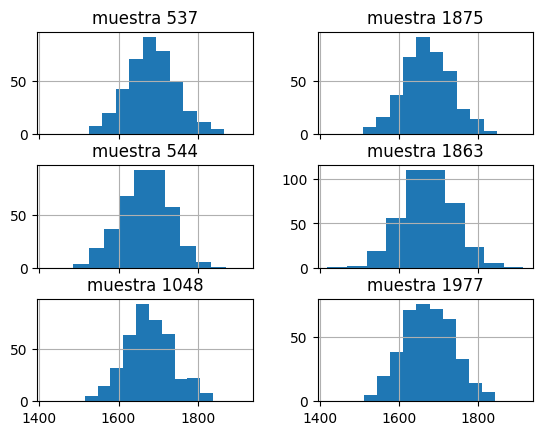

In [11]:
alturas_hombres.sample(6, axis = 1).hist(sharex= True)
plt.show()

<h2> Distribución de la suma

In [12]:
suma = alturas_hombres.sum()
suma

,0
muestra 1,668295.904256
muestra 2,669031.266276
muestra 3,669175.686221
muestra 4,668198.290619
muestra 5,671145.677989
...,...
muestra 1996,670886.026015
muestra 1997,669237.803887
muestra 1998,669619.496715
muestra 1999,670423.923610


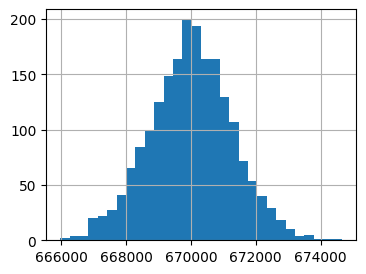

In [13]:
suma.hist(bins=30, figsize=(4,3))
plt.show()

<h2> Distribución de los promedios

In [14]:
medias = alturas_hombres.mean()
medias

,0
muestra 1,1670.739761
muestra 2,1672.578166
muestra 3,1672.939216
muestra 4,1670.495727
muestra 5,1677.864195
...,...
muestra 1996,1677.215065
muestra 1997,1673.094510
muestra 1998,1674.048742
muestra 1999,1676.059809


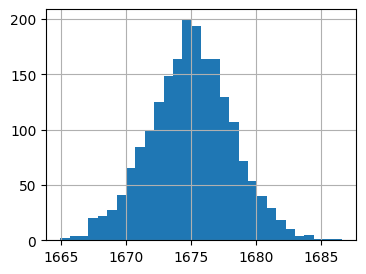

In [15]:
medias.hist(bins=30, figsize=(4,3))
plt.show()

<h2> Distribución de los errores

In [16]:
errores = mu - medias
errores

,0
muestra 1,4.260239
muestra 2,2.421834
muestra 3,2.060784
muestra 4,4.504273
muestra 5,-2.864195
...,...
muestra 1996,-2.215065
muestra 1997,1.905490
muestra 1998,0.951258
muestra 1999,-1.059809


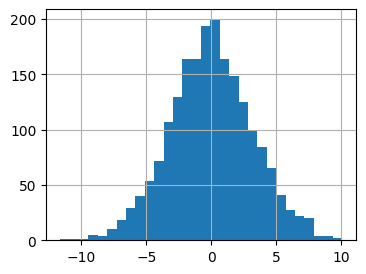

In [17]:
errores.hist(bins=30, figsize=(4,3))
plt.show()

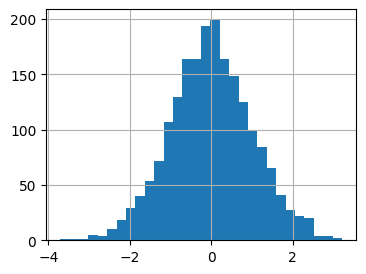

In [18]:
# podemos llegar a la distribución normal estándar
(errores/(sigma/np.sqrt(n))).hist(bins=30, figsize=(4,3))
plt.show()

# Distribución Bernoulli (Agujas de Buffon)

<h2> Obtener muestras

In [19]:
def cruce_agujas_Buffon(n):
    l = 1
    l_cuadrado = 10

    x = np.random.uniform(0, l_cuadrado, n) # coordenada x del centro de la aguja
    y = np.random.uniform(0, l_cuadrado, n) # cordenada y del centro del aguja
    𝜃 = np.random.uniform(0, np.pi, n) # angulo de rotación de la aguja en radianes, entre 0 y pi (180 grados)

    # Calcula coordenadas extremos (P1 y P2)
    x1 = x - (1/2 * np.cos(𝜃))
    y1 = y - (1/2 * np.sin(𝜃))

    x2 = x + (1/2 * np.cos(𝜃))
    y2 = y + (1/2 * np.sin(𝜃))

    # ¿Cruza alguna de las lineas del tapete?
    cruza = np.where(np.floor(y1) != np.floor(y2), 1, 0)    # np.floor(3.76) = 3

    return cruza

In [20]:
n = 3408 # tamaño de la muestra
m = 2000 # número de muestras
Buffon_df= pd.DataFrame.from_dict({'experimento '+str(i): cruce_agujas_Buffon(n) for i in range(1, m+1)})
Buffon_df

,experimento 1,experimento 2,experimento 3,experimento 4,experimento 5,experimento 6,experimento 7,experimento 8,experimento 9,experimento 10,...,experimento 1991,experimento 1992,experimento 1993,experimento 1994,experimento 1995,experimento 1996,experimento 1997,experimento 1998,experimento 1999,experimento 2000
0,1,1,1,1,0,0,0,1,0,0,...,0,1,0,1,1,1,1,0,0,1
1,1,1,1,1,1,1,1,1,1,0,...,1,0,1,0,0,0,1,1,1,0
2,1,0,1,1,1,1,1,1,0,0,...,1,1,0,1,1,1,1,0,1,1
3,1,0,1,1,1,1,1,0,0,0,...,0,0,1,0,0,1,1,0,0,1
4,1,1,0,1,1,1,0,1,1,1,...,1,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3403,0,0,0,0,1,1,1,1,1,1,...,1,0,1,1,0,1,1,1,1,1
3404,1,1,0,1,1,1,0,1,0,1,...,0,1,1,0,1,1,0,0,0,1
3405,1,1,0,0,0,0,1,0,1,1,...,0,0,0,1,1,0,0,1,0,1
3406,1,1,0,0,0,1,1,1,1,0,...,1,0,0,1,0,1,0,1,0,0


<h2> Distribución de cada muestra

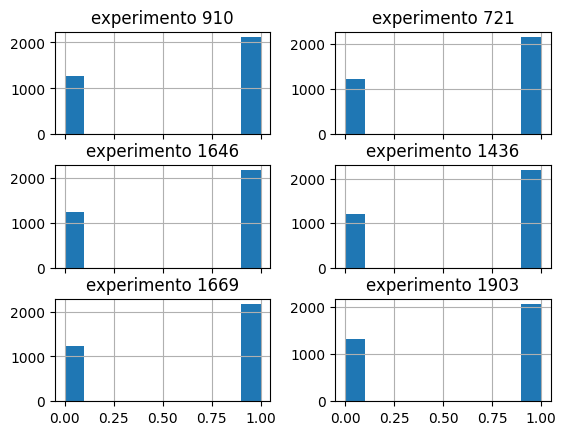

In [21]:
Buffon_df.sample(6, axis = 1).hist(sharex= True)
plt.show()

<h2>Distribución de la suma

In [22]:
suma = Buffon_df.sum()
suma

,0
experimento 1,2113
experimento 2,2245
experimento 3,2144
experimento 4,2201
experimento 5,2194
...,...
experimento 1996,2170
experimento 1997,2157
experimento 1998,2171
experimento 1999,2126


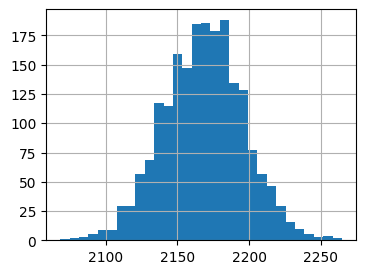

In [23]:
suma.hist(bins=30, figsize=(4,3))
plt.show()

<h2>Distribución de los promedios

In [24]:
medias = Buffon_df.mean()
medias

,0
experimento 1,0.620012
experimento 2,0.658744
experimento 3,0.629108
experimento 4,0.645833
experimento 5,0.643779
...,...
experimento 1996,0.636737
experimento 1997,0.632923
experimento 1998,0.637031
experimento 1999,0.623826


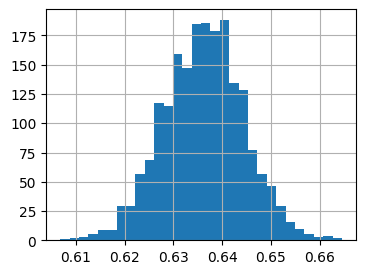

In [25]:
medias.hist(bins=30, figsize=(4,3))
plt.show()

<h2>Distribución de los errores

In [26]:
errores = 2/np.pi - medias
errores

,0
experimento 1,0.016608
experimento 2,-0.022124
experimento 3,0.007512
experimento 4,-0.009214
experimento 5,-0.007160
...,...
experimento 1996,-0.000117
experimento 1997,0.003697
experimento 1998,-0.000411
experimento 1999,0.012793


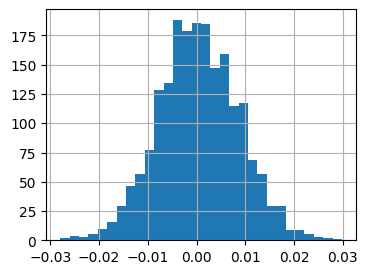

In [27]:
errores.hist(bins=30, figsize=(4,3))
plt.show()

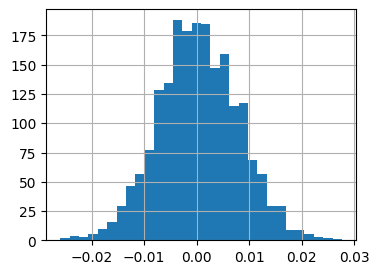

In [28]:
# podemos llegar a la distribución normal estándar
(errores/(sigma/np.sqrt(n))).hist(bins=30, figsize=(4,3))
plt.show()

# Distribución Bernoulli (obtener una vocal)

<h2> Preprocesar libro y obtener probabilidades de los caracteres

In [31]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [32]:
#Leer libro
libro = leer_libro('/content/drive/MyDrive/Datos/gabriel_garcia_marquez_cien_annos_soledad.txt')
borrar = ['Gabriel García Márquez',
          'Cien años de soledad',
          'EDITADO POR "EDICIONES LA CUEVA"',
          'Para J omi García Ascot y María Luisa Elio']

libro =  borrar_elementos(libro, borrar)
libro_limpio = limpiar_texto(libro)

In [33]:
#Cargar csv con distribución de probabilidad de letras
Ley_P_letras = pd.read_csv('https://raw.githubusercontent.com/AnIsAsPe/ElementosEstadisticaMachineLearningPython/master/Semana4/Ley_Probabilidad_caracteres_100a%C3%B1os.csv')

# Calcular la probabilidad de obtener una vocal

filtro_vocal = Ley_P_letras['caracter'].isin(list('aeiou'))
p = Ley_P_letras.loc[filtro_vocal, 'probabilidad'].sum()
p

0.38405272562528125

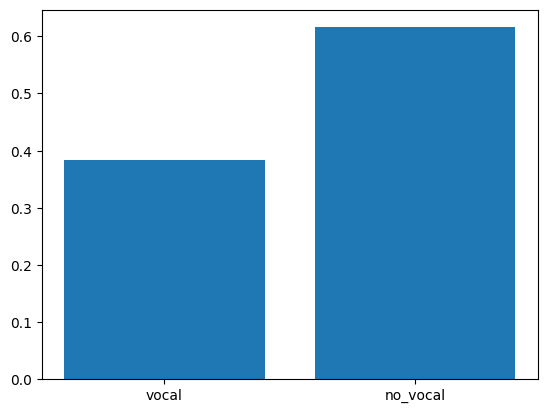

In [34]:
# Distribución bernoulli

plt.bar(['vocal','no_vocal'],[p, 1-p])
plt.show()

<h2> Obtener muestras

In [35]:
%%time
n = 400 # tamaño de la muestra
m = 100000 # número de muestras

muestras=pd.DataFrame()
muestras['texto'] = (genera_muestras_de_texto(libro_limpio, grado = 0,
                                              num_muestras = m, tam_muestra=n))
indice=pd.Series(['muestra_'+str(i) for i in range (1, m+1)])
muestras.index=indice
muestras['vocales'] = muestras['texto'].apply(cuenta_vocales)
muestras['p_estimada'] = muestras['vocales']/n
muestras['errores']= p - muestras['vocales']/n

CPU times: user 28 s, sys: 133 ms, total: 28.1 s
Wall time: 28.4 s


In [36]:
muestras.head()

,texto,vocales,p_estimada,errores
muestra_1,ano eaaonugdarr desiaasnndnu onnrr amdeun en e...,137,0.3425,0.041553
muestra_2,eeabartsenno r btnnteoaelro oa lanidudli me...,166,0.4150,-0.030947
muestra_3,cu ai e noaassuojddp aact eomroallai eu slaelh...,152,0.3800,0.004053
muestra_4,oivrqlilenn indqlvdeoseamtngrt tytuaso rlo or...,142,0.3550,0.029053
muestra_5,a naiise rrnehj eco e arase ua la iemporblsm...,151,0.3775,0.006553


<h2> Distribución de la suma

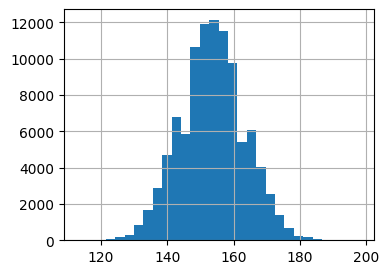

In [37]:
muestras['vocales'].hist(bins=30, figsize=(4,3))
plt.show()

<h2> Distribución de los promedios

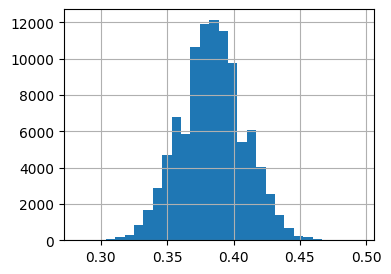

In [38]:
muestras['p_estimada'].hist(bins=30, figsize=(4,3))
plt.show()

<h2>Distribución de los errores

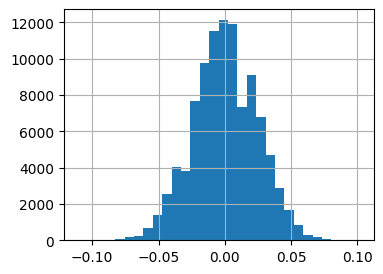

In [39]:
muestras['errores'].hist(bins=30, figsize=(4,3))
plt.show()

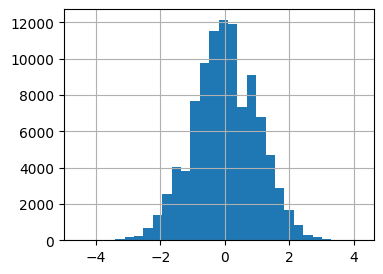

In [40]:
# podemos llegar a la distribución normal estandar
sigma = np.sqrt(p*(1-p))
(muestras['errores']/(sigma/np.sqrt(n))).hist(bins=30, figsize=(4,3))
plt.show()


# Distribución exponencial (carácteres antes de que salga n)

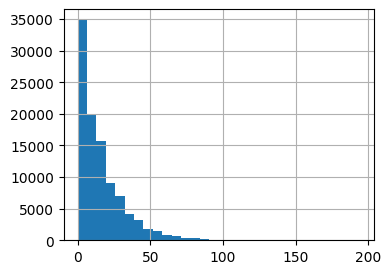

In [41]:
X = muestras['texto'].apply(cuenta_caracteres_antes_de_n)
X.hist(bins=30, figsize=(4,3))
plt.show()

In [42]:
X.mean()

15.88545

**Ejemplos de fenómenos con distribución exponencial:**
- Valores máximos de precipitación diaria
- Compras efectuadas por visitantes en página web
- Tiempo para que se produzca un fallo


¿Qué otros??

<h2> Obtener muestras

In [43]:
n = 400 # tamaño de la muestra
m = 2000 # número de muestras
m_exp = {'muestra '+str(i):np.random.choice(X, n) for i in range(1, m+1)}

muestras_exp = pd.DataFrame.from_dict(m_exp)
muestras_exp

,muestra 1,muestra 2,muestra 3,muestra 4,muestra 5,muestra 6,muestra 7,muestra 8,muestra 9,muestra 10,...,muestra 1991,muestra 1992,muestra 1993,muestra 1994,muestra 1995,muestra 1996,muestra 1997,muestra 1998,muestra 1999,muestra 2000
0,16,8,6,45,12,18,52,1,3,3,...,1,15,12,3,1,15,5,8,4,4
1,7,2,47,12,47,26,17,21,30,2,...,1,7,27,2,2,8,16,7,22,13
2,22,26,3,3,12,9,41,5,9,19,...,10,6,7,1,4,72,12,77,7,12
3,18,10,5,0,4,8,6,34,9,12,...,17,9,7,3,15,5,9,1,12,36
4,0,46,14,1,45,3,13,18,41,2,...,10,2,37,29,12,2,7,1,19,54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,37,6,10,20,4,0,2,7,4,12,...,1,2,40,43,17,10,9,0,11,58
396,15,13,15,17,80,54,36,39,12,18,...,6,17,21,12,4,73,3,11,3,2
397,20,0,23,18,0,0,5,26,10,34,...,11,14,44,30,0,1,7,0,9,12
398,10,29,5,10,27,32,66,12,5,10,...,7,5,5,19,5,14,46,13,5,7


<h2> Distribución de cada muestra

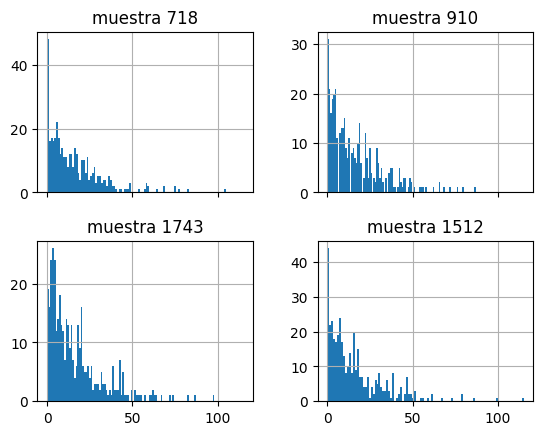

In [44]:
muestras_exp.sample(4, axis = 1).hist(sharex= True, bins=100)
plt.show()

<h2>Distribución de la suma

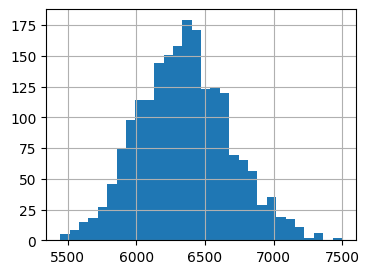

In [45]:
muestras_exp.sum().hist(bins=30, figsize=(4,3))
plt.show()

<h2>Distribución de los promedios

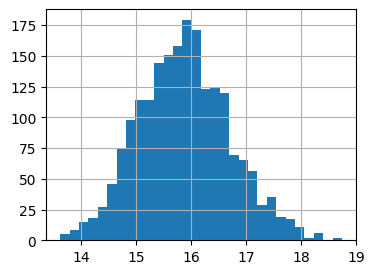

In [46]:
muestras_exp.mean().hist(bins=30, figsize=(4,3))
plt.show()


<h2>Distribución de los errores

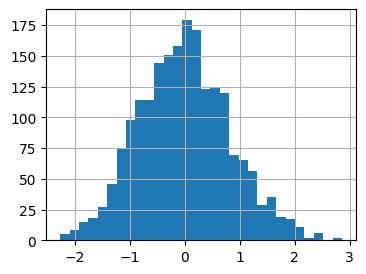

In [47]:
errores = muestras_exp.mean() - X.mean()
errores.hist(bins=30, figsize=(4,3))
plt.show()



https://seeing-theory.brown.edu/probability-distributions/index.html

